In [157]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load your image
image_path = './double_triangle.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [158]:
# Find the position of the brightest point
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_image)

# max_loc contains the (x, y) of the brightest point
brightest_x, brightest_y = max_loc

In [159]:
# # Define ROI coordinates (x, y, width, height)
# x, y, w, h = 2000, 2500, 1000, 1000  # Modify these values based on your image
# roi = gray_image[y:y+h, x:x+w]

# Define the size of your ROI
roi_width, roi_height = 500, 500  # Change this to your desired ROI size

# Calculate the top left corner of the ROI so that the brightest point is at the center
start_x = max(brightest_x - roi_width // 2, 0)
start_y = max(brightest_y - roi_height // 2, 0)

# Ensure the ROI does not go out of the image boundaries
end_x = min(start_x + roi_width, gray_image.shape[1])
end_y = min(start_y + roi_height, gray_image.shape[0])

# Adjust start_x and start_y if the ROI is out of bounds
start_x = max(end_x - roi_width, 0)
start_y = max(end_y - roi_height, 0)

# Extract the ROI
roi = gray_image[start_y:end_y, start_x:end_x]

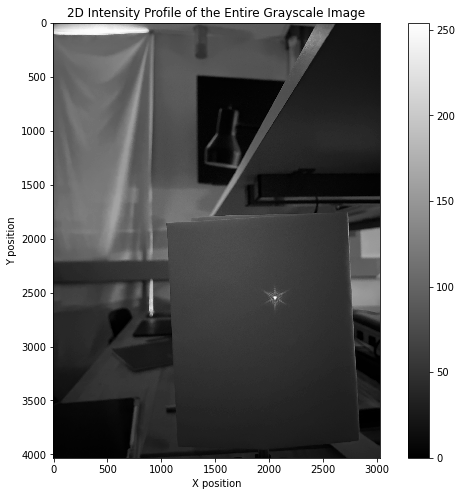

In [160]:

# Visualize the 2D intensity profile using a black and white colormap
plt.figure(figsize=(10, 8))  # Adjust size based on your display preferences
plt.imshow(gray_image, cmap='gray', interpolation='nearest')
plt.colorbar()  # Adds a color bar to help interpret the intensity values
plt.title('2D Intensity Profile of the Entire Grayscale Image')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

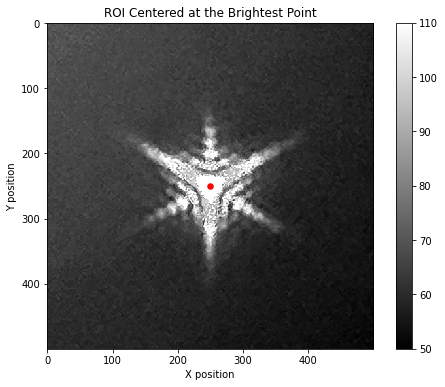

In [161]:
plt.figure(figsize=(8, 6))
plt.imshow(roi, cmap='gray', interpolation='nearest', vmax = 110)
plt.colorbar()
plt.scatter(roi_width // 2, roi_height // 2, c='red', s=30)  # Mark the brightest point
plt.title('ROI Centered at the Brightest Point')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

In [183]:
pattern = np.zeros(roi.shape)

for i in np.arange(roi.shape[0]):
    for j in np.arange(roi.shape[1]):
        # Unshift the results of the Fast Fourier Transform
        pattern[i][j] = roi[(j + inv.shape[1] // 2) % inv.shape[1]][(i + inv.shape[0] // 2) % inv.shape[0]]

In [256]:
inv = fft.ifft2(roi / np.sqrt(np.sum(roi ** 2)))
inv = np.absolute(inv)

pattern = np.zeros(inv.shape)
for i in np.arange(inv.shape[0]):
    for j in np.arange(inv.shape[1]):
        # Unshift the results of the Fast Fourier Transform
        pattern[i][j] = inv[(j + inv.shape[1] // 2) % inv.shape[1]][(i + inv.shape[0] // 2) % inv.shape[0]]

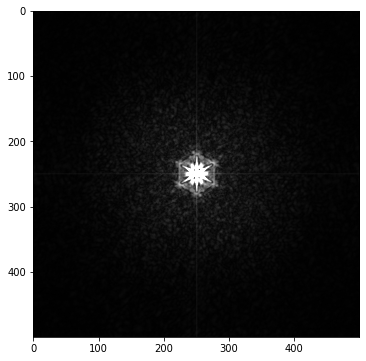

In [262]:
plt.figure(figsize=(8, 6))

#plt.xlim(240, 260)
#plt.ylim(240, 260)

plt.imshow(pattern, cmap='gray', interpolation='bilinear', vmax = 0.000025)
plt.show()

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
diffraction_image_path = './222double_triangle_pattern.png'
diffraction_image = cv2.imread(diffraction_image_path)

# Convert to grayscale
gray_diffraction_image= cv2.cvtColor(diffraction_image, cv2.COLOR_BGR2GRAY)

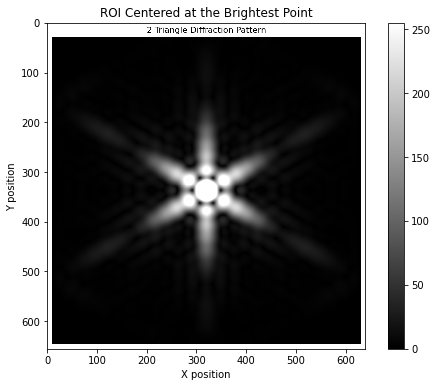

In [93]:
plt.figure(figsize=(8, 6))
plt.imshow(gray_diffraction_image, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('ROI Centered at the Brightest Point')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

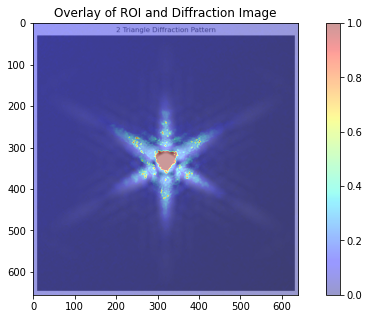

In [94]:
# Check if both images are the same size, if not, resize
if roi.shape != diffraction_image.shape:
    roi = cv2.resize(roi, (diffraction_image.shape[1], diffraction_image.shape[0]))

# Normalize the images for better effect in visualization
diffraction_image_norm = cv2.normalize(diffraction_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
roi_image_norm = cv2.normalize(roi, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Create a figure to display the results
plt.figure(figsize=(10, 5))

# Plot diffraction_image in one color map
plt.imshow(diffraction_image_norm, cmap='viridis', alpha=0.6)

# Overlay roi_image in another color map
plt.imshow(roi_image_norm, cmap='jet', alpha=0.4)

plt.title('Overlay of ROI and Diffraction Image')
plt.colorbar()
plt.show()

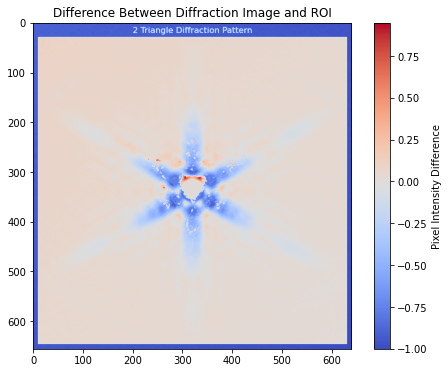

In [95]:
# Calculate the difference image
image_difference = -(diffraction_image_norm[:,:,0] - roi_image_norm)

# Create a figure to display the results
plt.figure(figsize=(8, 6))

# Plot the difference image
plt.imshow(image_difference, cmap='coolwarm')  # 'coolwarm' is good for highlighting positive and negative differences
plt.colorbar(label='Pixel Intensity Difference')
plt.title('Difference Between Diffraction Image and ROI')
plt.show()